In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from code import direct_problem as direct
from code import inverse_problem as inv

direct_problem was imported
inverse_problem was imported


# Входные данные

In [6]:
r=np.logspace(-1,3,25) 
param=[50,40,10,20,30,20,10,20,30,20,10,20,100]
N_layers_list=[3]
method='U'

In [7]:
start=[[50,40,
       10,200,
       100]]

bound=[[(25,75), (25,75),
       (1,25), (150,750),
       (50,150)]]

# Рассчёт

In [8]:
resistance=[]
for r_i in r:
    resistance.append(direct.calculate_apparent_resistance(param,method,r_i,10*int(1+r_i/200)))
# количество нулей функции бесселя растёт с ростом r_i, ускоряя процесс при малых r_i и сохраняя точность при больших
# 200 подобранно эмпирически, вроде справляется наилучшим способом

In [9]:
exp_data=np.array([r, resistance ]).T
loss='RMSPE'
minim='L-BFGS-B'
inverse=inv.inverse_problem_solver(N_layers_list,method, exp_data, minimization_method=minim, loss_type=loss, start=start,boundaries=bound)
results=inverse[0] # модели полученные из обратной задачи
ind=inverse[1] #  индекс модели с наименьшим loss_N_layers в results
print(ind)

0


In [23]:
rk_start=[]
for r_i in r:
    rk_start.append(direct.calculate_apparent_resistance(start[0],method,r_i,num_of_zeros=10*int(1+r_i/200)))
rk_start=np.array(rk_start)
print(inv.RMSE(rk_start,resistance))
print(inv.RMSPE(rk_start,resistance),'%')

10.718743289954926
20.635727427609833 %


# Вывод количества слоёв в модели, её параметров и полученной ошибки

In [24]:
result = [ ]
for i in range (len(N_layers_list)):
    result.append(results[i].x)
    print('\nnumber of layers= ', N_layers_list[i], '\nparam =', results[i].x, f'\nloss {loss} =', results[i].fun)


number of layers=  3 
param = [ 50.03462799  33.15798695  19.56001373 151.90923518 100.32810818] 
loss RMSPE = 0.48525310845197844


# Блок визуализации

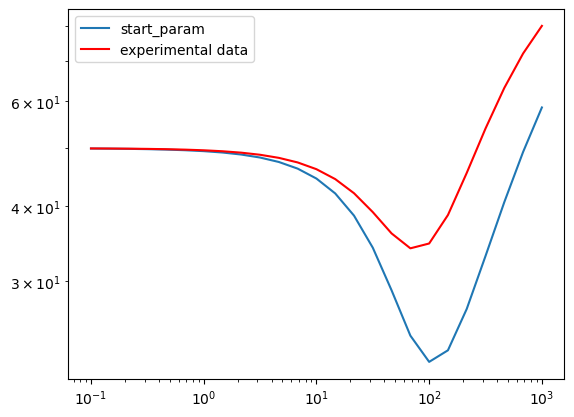

In [25]:
plt.loglog(r,rk_start, label='start_param')
plt.loglog(r,resistance,c='red', label='experimental data')
plt.legend()

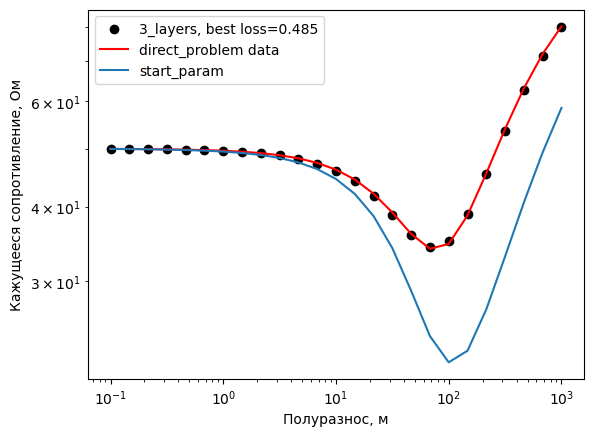

In [26]:
for i in range(len(N_layers_list)):
    rk=[]
    for r_i in r:
        rk.append(direct.calculate_apparent_resistance(results[i].x,method,r_i,num_of_zeros=10*int(1+r_i/200)))
    rk=np.array(rk)
    if i==ind:
        plt.scatter(r,rk, c='black',label=f'{N_layers_list[i]}_layers, best loss={np.round(results[i].fun,3)}')
    else: plt.loglog(r,rk, label=f'{N_layers_list[i]}_layers')
plt.loglog(r,resistance,c='red', label='direct_problem data')
plt.loglog(r,rk_start, label='start_param')
plt.xlabel('Полуразнос, м')
plt.ylabel('Кажущееся сопротивление, Ом')
plt.legend()